#**Importing Libraries and Reading the Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif

In [4]:
hd = pd.read_csv('/content/heart_cleaned.csv')
hd.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3
0,-0.256357,1,-0.371077,-0.701940,0,0.801255,0,-0.008573,2,0,False,False,False,True,False,False,True,False,True
1,-0.145641,1,0.484371,-0.892006,1,0.233473,1,1.907455,0,0,False,False,False,False,False,False,False,False,True
2,1.736541,1,0.769520,-1.504441,0,-1.076792,1,1.451258,0,0,False,False,False,True,False,False,False,False,True
3,0.740092,1,0.940610,-0.892006,0,0.495526,0,-0.920967,1,0,False,False,False,True,False,False,True,False,True
4,0.850808,0,0.370311,1.029772,1,-1.906626,0,0.812582,3,0,False,False,False,True,False,True,False,True,False


In [5]:
X = hd.drop("target", axis=1)
y = hd["target"]
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)

Shape of X: (298, 18)

Shape of y: (298,)


#**Feature Importance**

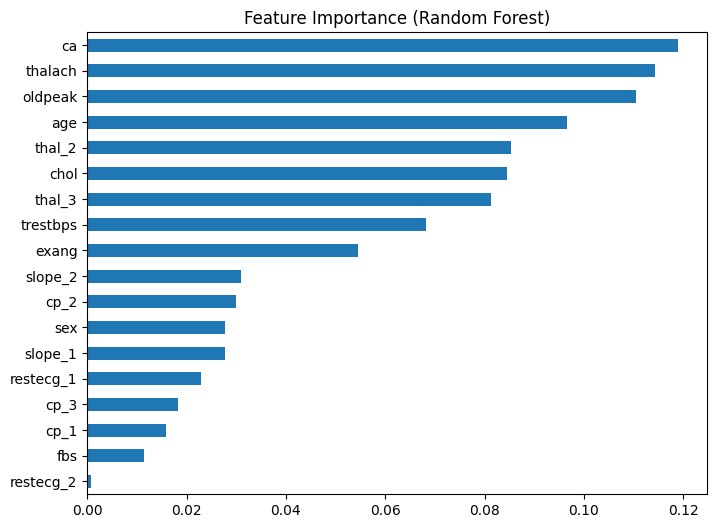

In [6]:
#train a simple Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
# get feature importances
importances=rf.feature_importances_
feat_importances=pd.Series(importances, index=X.columns)

#plot
feat_importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

#**Recursive Feature Elimination (RFE)**

In [7]:
m2 = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=m2, n_features_to_select=9)  # We can change the number of features if we want
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'ca', 'thal_2', 'thal_3']


# **Chi-Square Test (for categorical features) and F_classif (for continuous features)**

In [8]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_2,thal_3
0,-0.256357,1,-0.371077,-0.701940,0,0.801255,0,-0.008573,2,False,False,False,True,False,False,True,False,True
1,-0.145641,1,0.484371,-0.892006,1,0.233473,1,1.907455,0,False,False,False,False,False,False,False,False,True
2,1.736541,1,0.769520,-1.504441,0,-1.076792,1,1.451258,0,False,False,False,True,False,False,False,False,True
3,0.740092,1,0.940610,-0.892006,0,0.495526,0,-0.920967,1,False,False,False,True,False,False,True,False,True
4,0.850808,0,0.370311,1.029772,1,-1.906626,0,0.812582,3,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1.515108,0,-0.656226,-0.723059,0,-1.513547,0,0.447624,0,False,True,False,False,False,True,False,True,False
294,-1.142089,0,-1.340585,-2.201350,0,1.106983,0,-0.373531,0,False,True,False,True,False,True,False,True,False
295,-0.256357,1,-0.199987,0.206153,0,0.495526,1,-0.920967,1,False,False,False,True,False,False,True,False,True
296,0.518659,1,1.624968,0.586285,0,-1.076792,0,-0.920967,0,False,False,True,False,False,False,True,True,False


In [9]:
continuous_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = [col for col in X.columns if col not in continuous_features]

X_cont = X[continuous_features]
X_cat = X[categorical_features]

In [10]:
scaler = MinMaxScaler()
X_cat_scaled = scaler.fit_transform(X_cat)

chi_scores, chi_p = chi2(X_cat_scaled, y)
chi_df = pd.DataFrame({
    "Feature": categorical_features,
    "Score": chi_scores,
    "p-value": chi_p,
    "Test": "Chi2"})

In [11]:
f_scores, f_p = f_classif(X_cont, y)
f_df = pd.DataFrame({
    "Feature": continuous_features,
    "Score": f_scores,
    "p-value": f_p,
    "Test": "ANOVA F"

})

In [12]:
all_features_df = pd.concat([chi_df, f_df]).sort_values(by="Score", ascending=False).reset_index(drop=True)

all_features_df

,Feature,Score,p-value,Test
0,oldpeak,66.601186,9.622688e-15,ANOVA F
1,thalach,61.860905,6.947434e-14,ANOVA F
2,thal_3,43.245743,4.827870e-11,Chi2
3,exang,37.698637,8.256224e-10,Chi2
4,thal_2,36.475559,1.545926e-09,Chi2
5,slope_2,24.033905,9.465416e-07,Chi2
6,slope_1,22.031328,2.682364e-06,Chi2
7,cp_2,19.843215,8.406057e-06,Chi2
8,ca,17.483610,2.897953e-05,Chi2
9,age,16.392025,6.581801e-05,ANOVA F


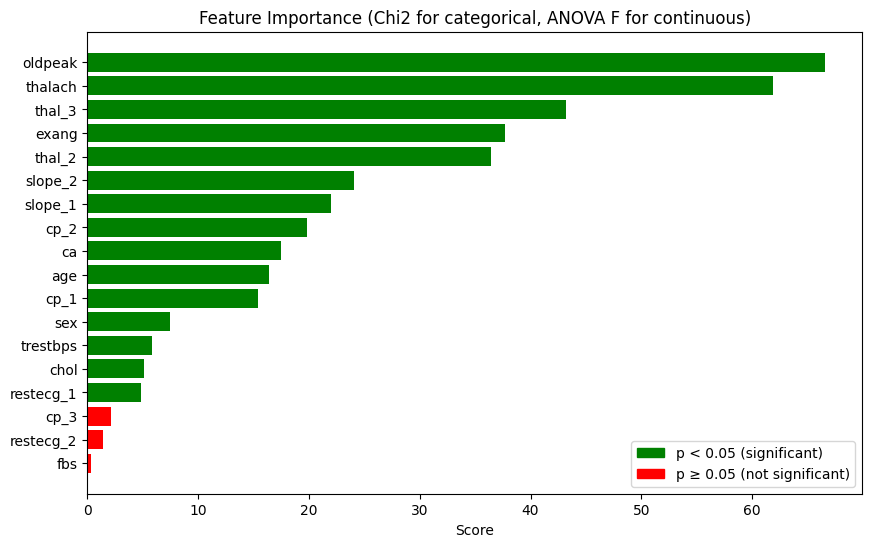

In [13]:
plt.figure(figsize=(10,6))
colors = ["green" if p < 0.05 else "red" for p in all_features_df["p-value"]]
plt.barh(all_features_df["Feature"], all_features_df["Score"], color=colors)
plt.xlabel("Score")
plt.title("Feature Importance (Chi2 for categorical, ANOVA F for continuous)")
plt.gca().invert_yaxis()

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='p < 0.05 (significant)')
red_patch = mpatches.Patch(color='red', label='p ≥ 0.05 (not significant)')
plt.legend(handles=[green_patch, red_patch])

plt.show()

# **Selecting Top Features**

In [14]:
# --- RandomForest importance: get top 6 ---
top_rf = feat_importances.sort_values(ascending=False).head(6).index

# --- Chi2/ANOVA: already sorted in all_features_df ---
top_stat = all_features_df.sort_values(by="Score", ascending=False).head(6)["Feature"]

# --- Combine all sources (RFE + RF importance + statistical tests) ---
top_features = list(set(selected_features) | set(top_rf) | set(top_stat))

print("Final Top Features:", top_features)


Final Top Features: ['ca', 'chol', 'thal_3', 'slope_2', 'age', 'exang', 'trestbps', 'thal_2', 'oldpeak', 'thalach']


# **Saving the Final Dataset**

In [15]:
hd = hd[top_features]
hd['target'] = y

In [16]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ca        298 non-null    int64  
 1   chol      298 non-null    float64
 2   thal_3    298 non-null    bool   
 3   slope_2   298 non-null    bool   
 4   age       298 non-null    float64
 5   exang     298 non-null    int64  
 6   trestbps  298 non-null    float64
 7   thal_2    298 non-null    bool   
 8   oldpeak   298 non-null    float64
 9   thalach   298 non-null    float64
 10  target    298 non-null    int64  
dtypes: bool(3), float64(5), int64(3)
memory usage: 19.6 KB


In [17]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [18]:
hd.to_csv("/content/drive/MyDrive/Heart Disease Risks Project/data/final_heart.csv", index=False)